## Setup

In [2]:
import time

import pickle

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import missingno

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE

from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [3]:
!git clone https://github.com/amir-saniyan/HodaDatasetReader.git

Cloning into 'HodaDatasetReader'...
remote: Enumerating objects: 24, done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 24
Unpacking objects: 100% (24/24), done.


In [4]:
from HodaDatasetReader.HodaDatasetReader import read_hoda_dataset

In [5]:
X_train, y_train = read_hoda_dataset('/content/HodaDatasetReader/DigitDB/Train 60000.cdb')
X_test, y_test = read_hoda_dataset('/content/HodaDatasetReader/DigitDB/Test 20000.cdb')

In [6]:
X_train.shape

(60000, 1024)

In [46]:
X_train[0].shape

(1024,)

In [48]:
X_train[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [7]:
X_test.shape

(20000, 1024)

In [8]:
X_train.max(), X_train.min()

(1.0, 0.0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


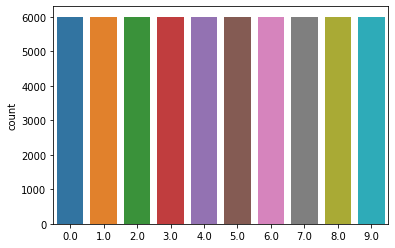

In [9]:
sns.countplot(y_train)

## imshow

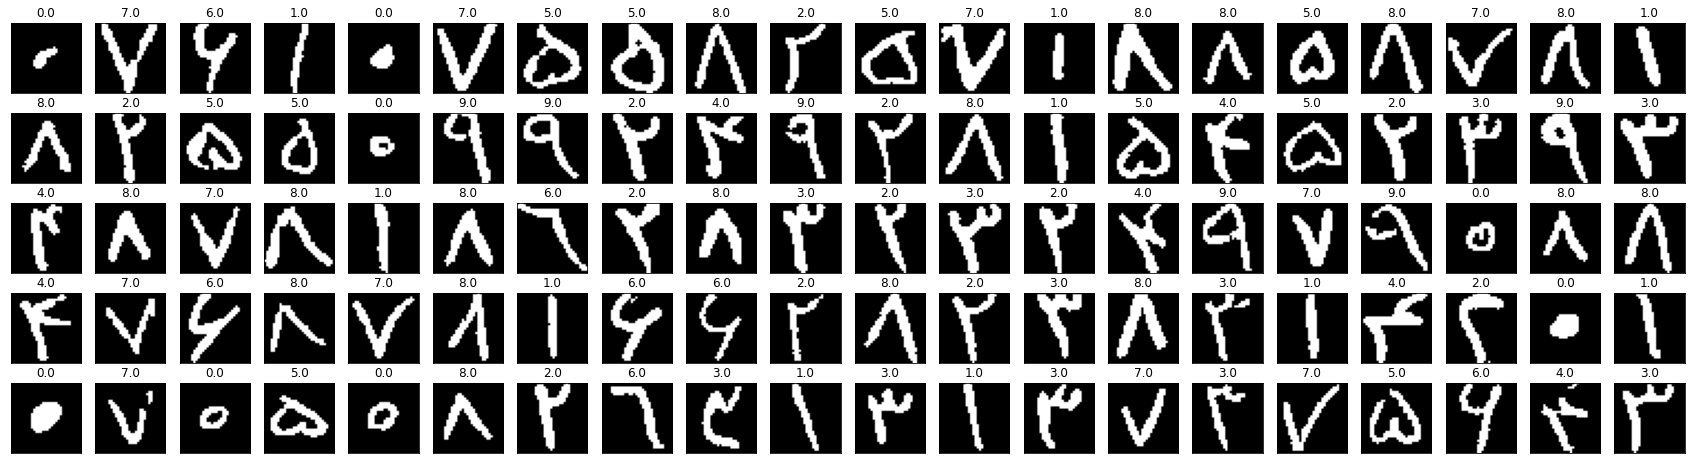

In [10]:
fig, axes = plt.subplots(5, 20, figsize=(30, 8))
# fig.subplots_adjust(hspace=0.01, wspace=0.01)

idxs = np.random.randint(low=0, high=60000, size=100)
for i , ax in zip(idxs, axes.flat):
  ax.imshow(X_train[i].reshape(32, 32), cmap='gray')
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title(y_train[i])

## PCA

### Elbow

In [11]:
pca = PCA()
PC_digits = pca.fit_transform(X_train)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 8 Text major ticklabel objects>)

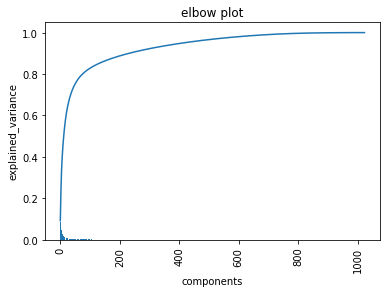

In [12]:
plt.bar(np.arange(1024), pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('elbow plot')
plt.xlabel('components')
plt.ylabel('explained_variance')
plt.xticks(rotation=90)

In [13]:
np.argwhere(np.cumsum(pca.explained_variance_ratio_) < .95).max()

412

In [14]:
np.cumsum(pca.explained_variance_ratio_)[412]

0.94993114

In [15]:
np.argwhere(np.cumsum(pca.explained_variance_ratio_) < .8).max()

74

### Visualize in 2D

In [ ]:
t1 = time.time()
pca2 = PCA(n_components=2)
pc2_digits = pca2.fit_transform(X_train)
t2 = time.time()
print(f'execution time: {(t2-t1)/60}')

execution time: 0.04171177546183268


(Text(0.5, 0, 'PC-1'), Text(0, 0.5, 'PC-2'))

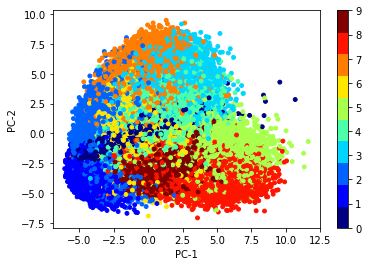

In [ ]:
plt.scatter(pc2_digits[:, 0], pc2_digits[:, 1], s=15, c=y_train, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar()
plt.xlabel('PC-1'), plt.ylabel('PC-2')

In [ ]:
# extract a subset of data
number_of_rows = X_train.shape[0]
random_indices = np.random.choice(number_of_rows, size=5000, replace=False)
X_train_5000 = X_train[random_indices, :]
y_train_5000 = y_train[random_indices]

In [ ]:
t1 = time.time()
tsne2 = TSNE(n_components=2)
tsne2_X_train = tsne2.fit_transform(X_train_5000)
t2 = time.time()
print(f'execution time: {(t2-t1)/60}')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


execution time: 0.6584740996360778


(Text(0.5, 0, 't-sne-1'), Text(0, 0.5, 't-sne-2'))

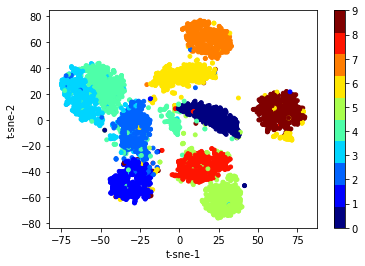

In [ ]:
plt.scatter(tsne2_X_train[:, 0], tsne2_X_train[:, 1], s=15, c=y_train_5000, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar()
plt.xlabel('t-sne-1'), plt.ylabel('t-sne-2')

### Visualize in 3D

In [ ]:
t1 = time.time()
pca3 = PCA(n_components=3)
pc3_digits = pca3.fit_transform(X_train)
t2 = time.time()
print(f'execution time: {(t2-t1)/60}')

execution time: 0.05559394756952921


[]

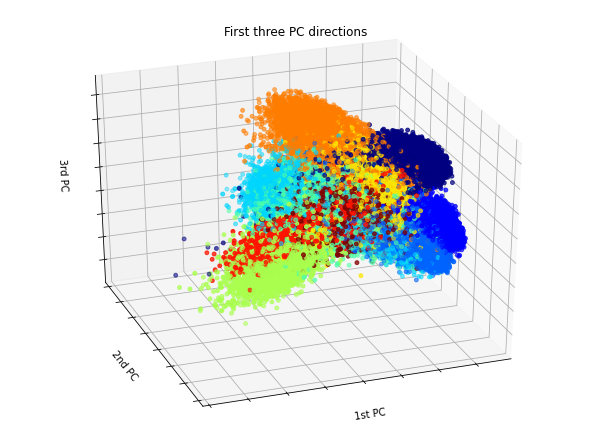

In [ ]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(
    pc3_digits[:, 0],
    pc3_digits[:, 1],
    pc3_digits[:, 2],
    c=y_train,
    cmap=plt.cm.get_cmap('jet', 10),
    s=15,
)

ax.set_title("First three PC directions")
ax.set_xlabel("1st PC")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd PC")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd PC")
ax.w_zaxis.set_ticklabels([])

In [ ]:
t1 = time.time()
tsne3 = TSNE(n_components=3)
tsne3_X_train = tsne3.fit_transform(X_train_5000)
t2 = time.time()
print(f'execution time: {(t2-t1)/60}')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


execution time: 3.0170503497123717


[]

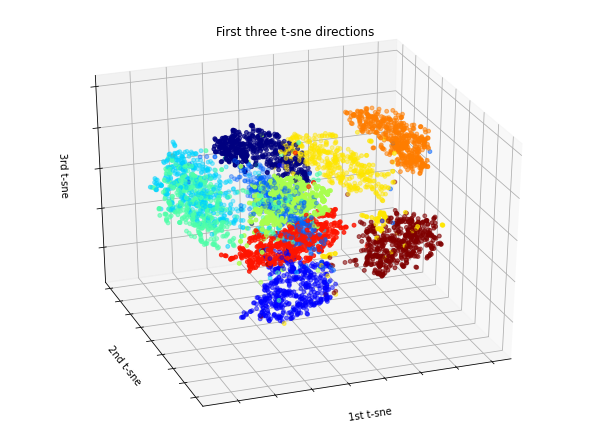

In [ ]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(
    tsne3_X_train[:, 0],
    tsne3_X_train[:, 1],
    tsne3_X_train[:, 2],
    c=y_train_5000,
    cmap=plt.cm.get_cmap('jet', 10),
    s=15,
)

ax.set_title("First three t-sne directions")
ax.set_xlabel("1st t-sne")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd t-sne")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd t-sne")
ax.w_zaxis.set_ticklabels([])

## PCA 74 (contains about 80% of information)

In [30]:
pca74 = PCA(n_components=74)
X_train_pca74 = pca74.fit_transform(X_train)
X_test_pca74 = pca74.transform(X_test)

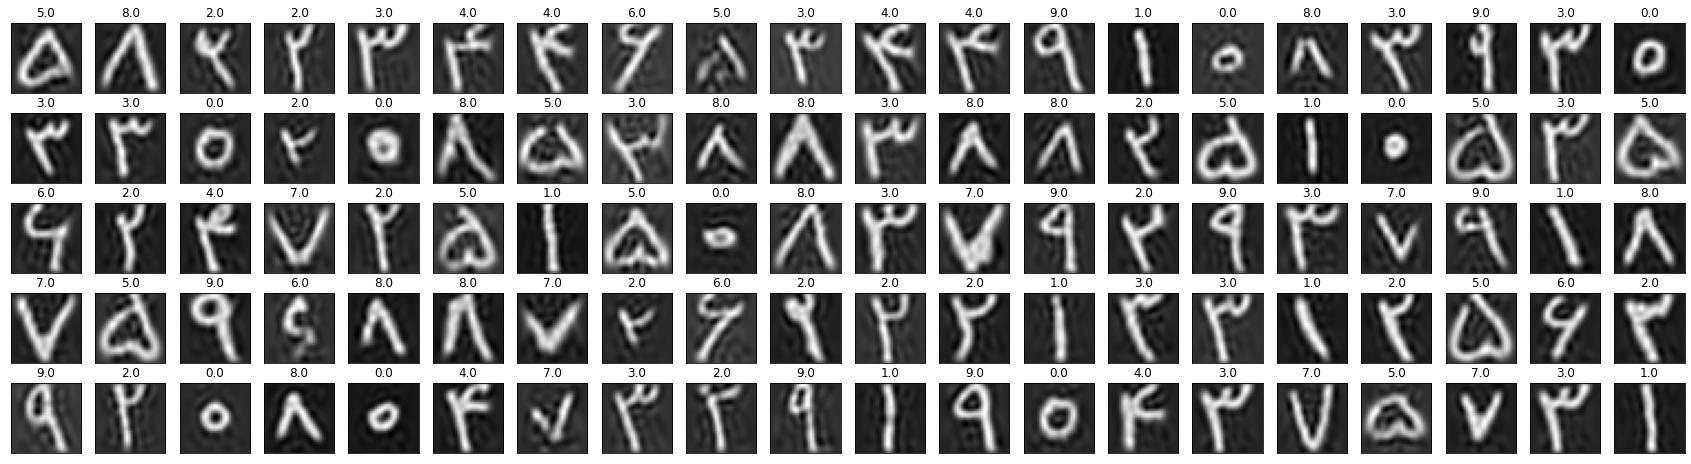

In [31]:
fig, axes = plt.subplots(5, 20, figsize=(30, 8))
# fig.subplots_adjust(hspace=0.01, wspace=0.01)

samples = pca74.inverse_transform(X_train_pca74)

idxs = np.random.randint(low=0, high=1796, size=100)
for i , ax in zip(idxs, axes.flat):
  ax.imshow(samples[i].reshape(32, 32), cmap='gray')
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title(y_train[i])

### Gaussian Naive Bayes

In [56]:
steps = Pipeline([
    ('pca', PCA(n_components=74)),
    ('nb', GaussianNB())
])

params = {
}

search_nb = GridSearchCV(steps, params, verbose=10)

In [57]:
t1 = time.time()
search_nb.fit(X_train, y_train)
t2 = time.time()
print(f'execution time {(t2-t1)/60}')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START ............................................................
[CV 1/5; 1/1] END .............................., score=0.900 total time=   4.7s
[CV 2/5; 1/1] START ............................................................
[CV 2/5; 1/1] END .............................., score=0.908 total time=   6.0s
[CV 3/5; 1/1] START ............................................................
[CV 3/5; 1/1] END .............................., score=0.912 total time=   4.2s
[CV 4/5; 1/1] START ............................................................
[CV 4/5; 1/1] END .............................., score=0.900 total time=   4.6s
[CV 5/5; 1/1] START ............................................................
[CV 5/5; 1/1] END .............................., score=0.899 total time=   4.6s
execution time 0.4913894454638163


In [58]:
search_nb.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=74)), ('nb', GaussianNB())])

#### Evaluation

In [59]:
y_preds_nb = search_nb.predict(X_test)
print(classification_report(y_test, y_preds_nb))

              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95      2000
         1.0       0.95      0.92      0.94      2000
         2.0       0.70      0.80      0.75      2000
         3.0       0.82      0.72      0.76      2000
         4.0       0.75      0.75      0.75      2000
         5.0       0.74      0.94      0.83      2000
         6.0       0.72      0.74      0.73      2000
         7.0       0.98      0.81      0.88      2000
         8.0       0.93      0.82      0.87      2000
         9.0       0.78      0.86      0.82      2000

    accuracy                           0.83     20000
   macro avg       0.84      0.83      0.83     20000
weighted avg       0.84      0.83      0.83     20000



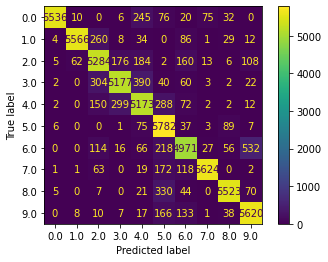

In [60]:
ConfusionMatrixDisplay.from_estimator(search_nb, X_train, y_train)

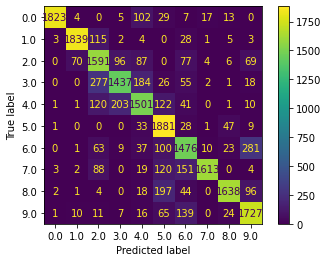

In [61]:
ConfusionMatrixDisplay.from_estimator(search_nb, X_test, y_test)

#### Wrong Predictions

In [62]:
def plot_wrong_preds(samples, y_test, y_preds):
  '''
  plots 100 wrong predictions randomly.
  '''

  fig, axes = plt.subplots(10, 10, 
                         figsize=(50, 50),
                         subplot_kw={
                           'xticks': [],
                           'yticks': []
                        },
                         gridspec_kw=dict(hspace=0.1, wspace=0.6))

  for i , ax in zip(idxs, axes.flat):
    ax.imshow(samples[i].reshape(32, 32), cmap='gray')
    ax.set_title(f'class={y_test[i]}', fontdict={'color': 'green' if y_test[i] == y_preds[i] else 'red', 'fontsize': 40})
    ax.set_ylabel(f'predicted={y_preds[i]}', fontdict={'fontsize': 30})

In [63]:
idxs = np.ndarray.flatten(np.argwhere(y_test != y_preds_nb))
print(len(idxs))

3474


In [65]:
idxs = np.random.choice(idxs, 100, replace=False)
samples = pca74.inverse_transform(X_test_pca74)

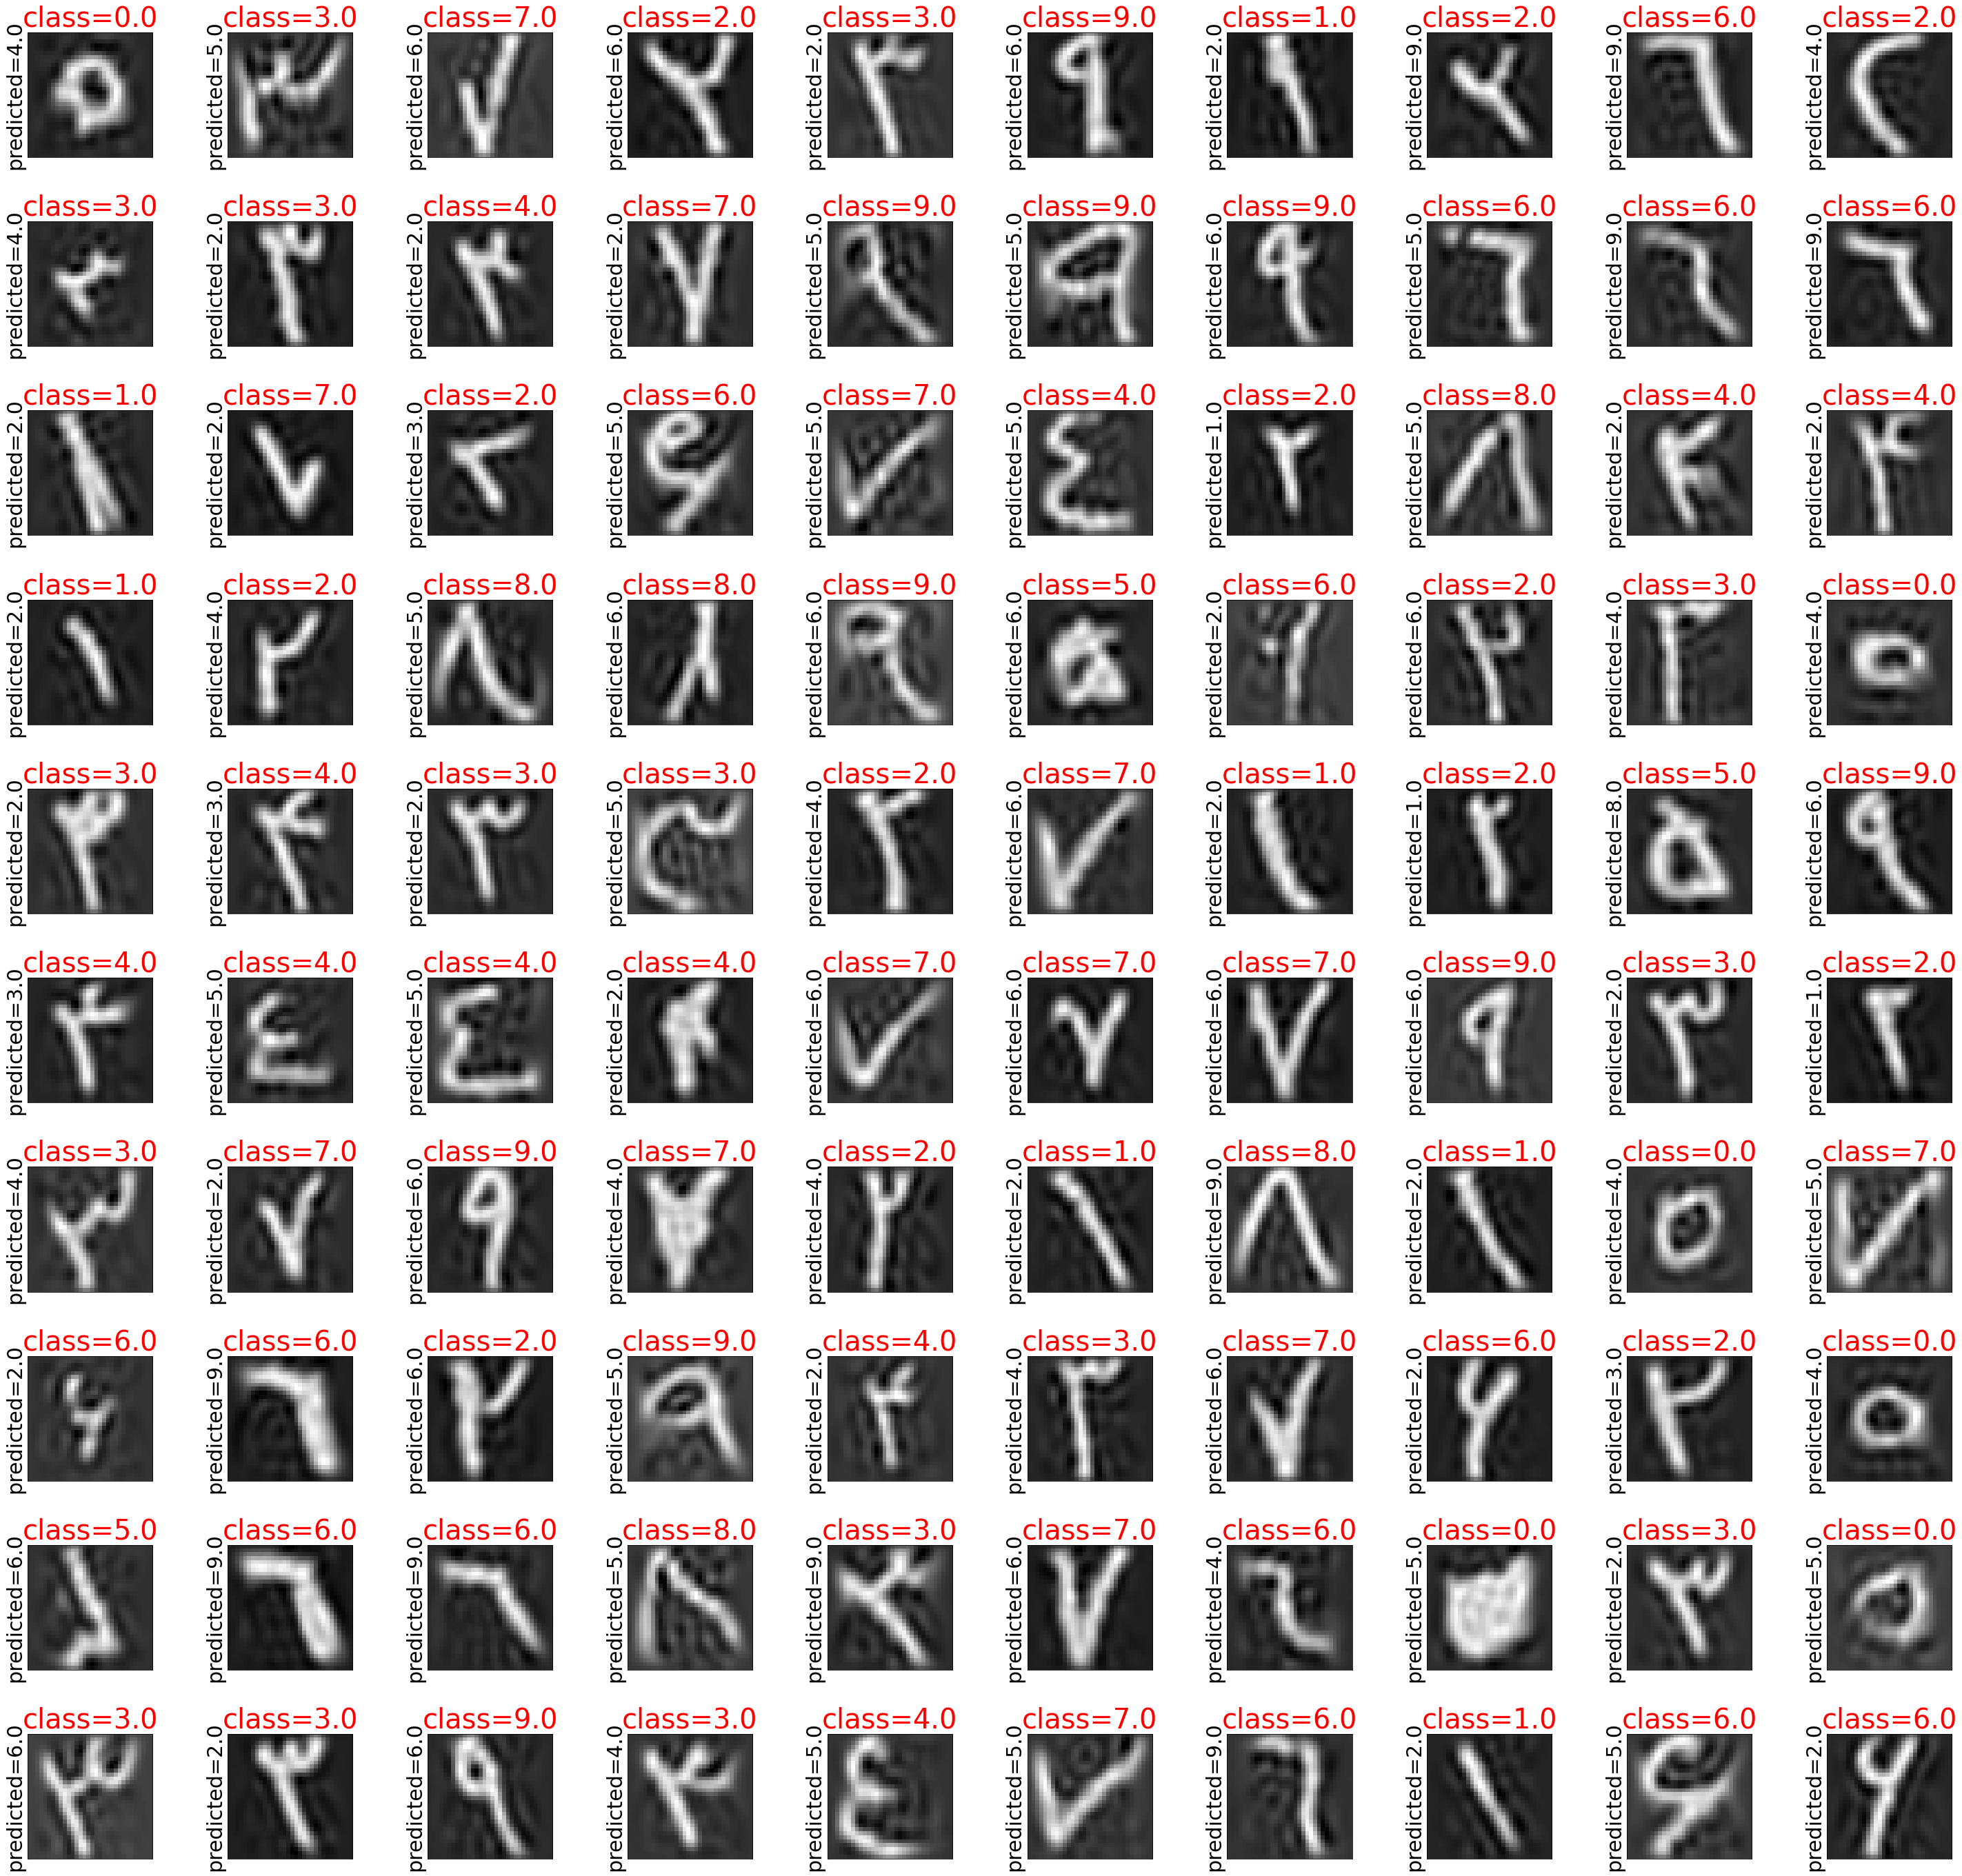

In [67]:
plot_wrong_preds(samples, y_test, y_preds_nb)

#### Save

In [68]:
model = search_nb
# save the model
filename = 'nb_model.pkl'
with open(filename, 'wb') as file:
  pickle.dump(model, file)

# load the model
# with open(filename, 'rb') as file:
#   pickle_model = pickle.load(file)

### Logistic Regression

In [69]:
steps = Pipeline([
    ('pca', PCA(n_components=74)),
    ('log_reg', LogisticRegression(max_iter=10000))
])

params = {
    'log_reg__C': [0.1, 0.5, 1, 10, 30, 40, 50, 75, 100, 500, 1000],
}

search_log_reg = GridSearchCV(steps, params, verbose=10)

In [70]:
t1 = time.time()
search_log_reg.fit(X_train, y_train)
t2 = time.time()
print(f'execution time {(t2-t1)/60}')

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV 1/5; 1/11] START log_reg__C=0.1.............................................
[CV 1/5; 1/11] END ..............log_reg__C=0.1;, score=0.959 total time=  24.8s
[CV 2/5; 1/11] START log_reg__C=0.1.............................................
[CV 2/5; 1/11] END ..............log_reg__C=0.1;, score=0.961 total time=  29.0s
[CV 3/5; 1/11] START log_reg__C=0.1.............................................
[CV 3/5; 1/11] END ..............log_reg__C=0.1;, score=0.964 total time=  25.0s
[CV 4/5; 1/11] START log_reg__C=0.1.............................................
[CV 4/5; 1/11] END ..............log_reg__C=0.1;, score=0.958 total time=  25.9s
[CV 5/5; 1/11] START log_reg__C=0.1.............................................
[CV 5/5; 1/11] END ..............log_reg__C=0.1;, score=0.962 total time=  24.4s
[CV 1/5; 2/11] START log_reg__C=0.5.............................................
[CV 1/5; 2/11] END ..............log_reg__C=0.5;

In [71]:
search_log_reg.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=74)),
                ('log_reg', LogisticRegression(C=10, max_iter=10000))])

#### Evaluation

In [72]:
y_preds_log_reg = search_log_reg.predict(X_test)
print(classification_report(y_test, y_preds_log_reg))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      2000
         1.0       0.93      0.98      0.96      2000
         2.0       0.86      0.89      0.87      2000
         3.0       0.90      0.87      0.88      2000
         4.0       0.89      0.89      0.89      2000
         5.0       0.96      0.96      0.96      2000
         6.0       0.92      0.90      0.91      2000
         7.0       0.98      0.96      0.97      2000
         8.0       0.97      0.95      0.96      2000
         9.0       0.92      0.92      0.92      2000

    accuracy                           0.93     20000
   macro avg       0.93      0.93      0.93     20000
weighted avg       0.93      0.93      0.93     20000



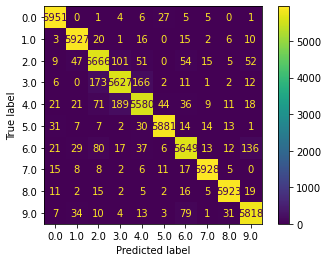

In [73]:
ConfusionMatrixDisplay.from_estimator(search_log_reg, X_train, y_train)

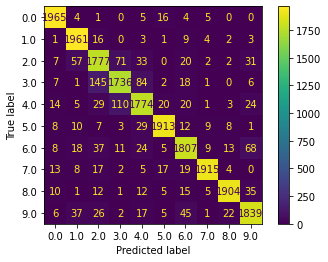

In [74]:
ConfusionMatrixDisplay.from_estimator(search_log_reg, X_test, y_test)

#### Wrong Predictions

In [75]:
idxs = np.ndarray.flatten(np.argwhere(y_test != y_preds_log_reg))
print(len(idxs))

1409


In [76]:
idxs = np.random.choice(idxs, size=100, replace=False)
samples = pca74.inverse_transform(X_test_pca74)

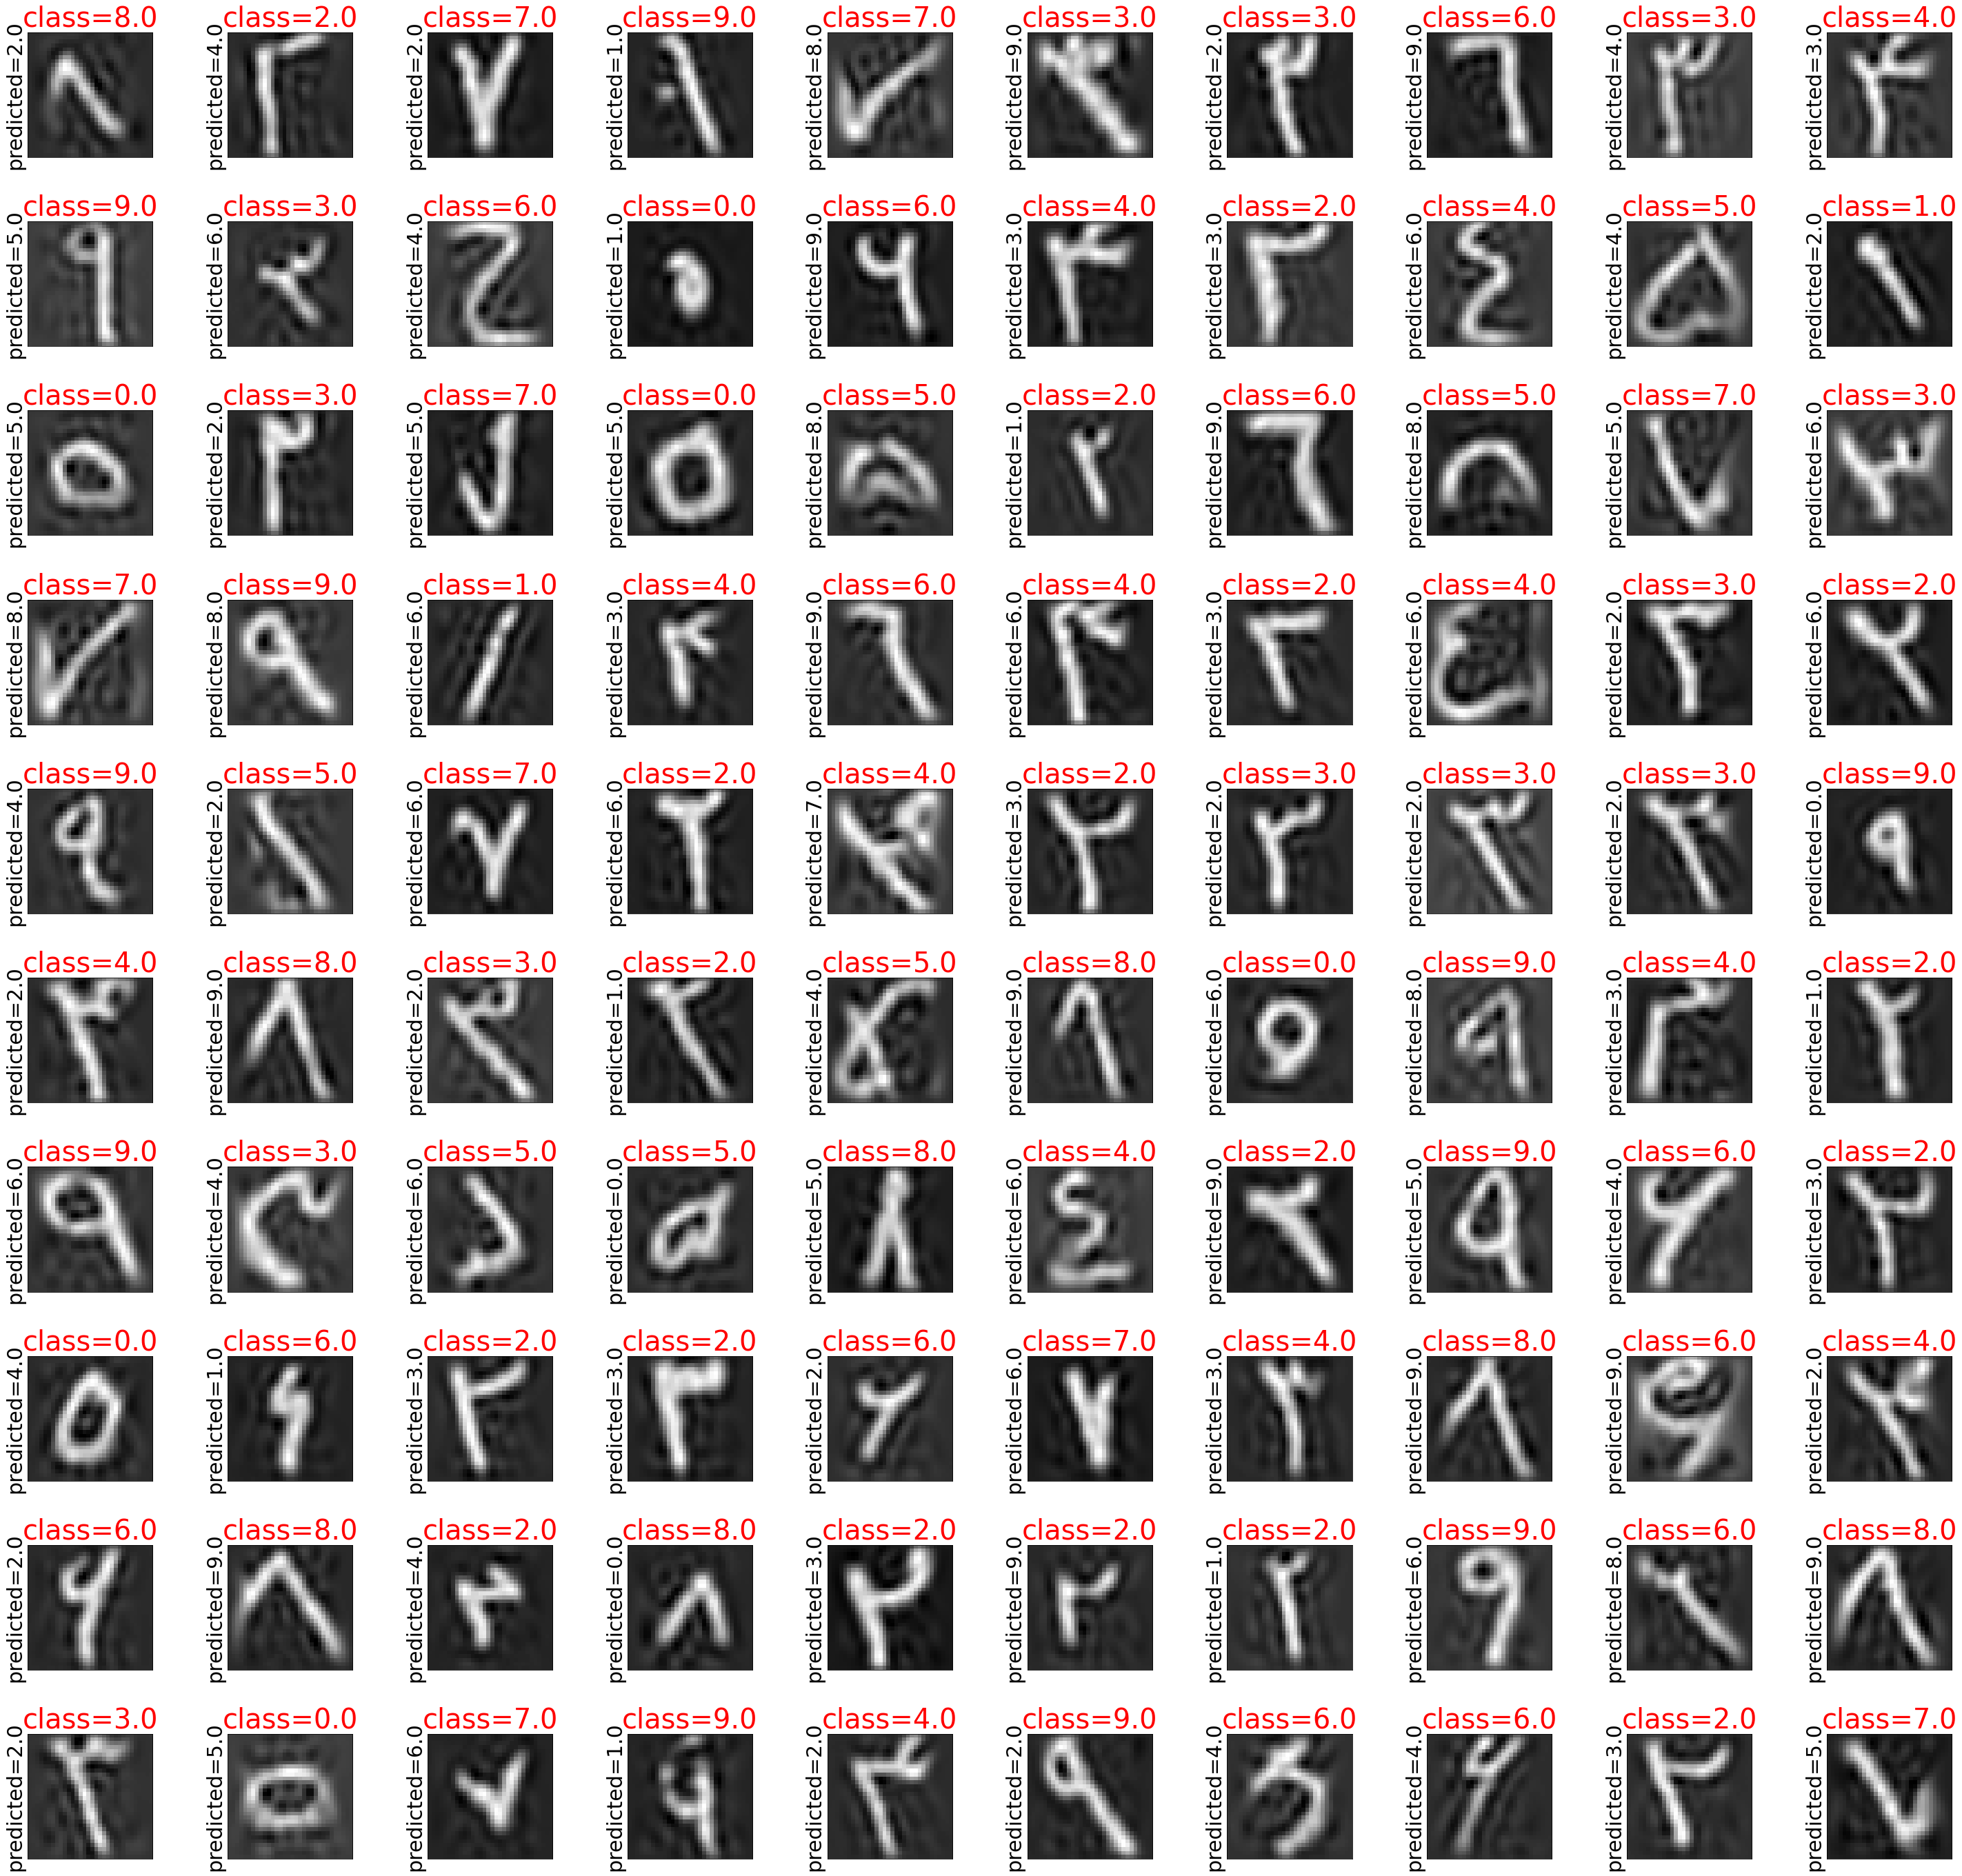

In [77]:
plot_wrong_preds(samples, y_test, y_preds_log_reg)

#### Save

In [78]:
model = search_log_reg
# save the model
filename = 'log_reg_model.pkl'
with open(filename, 'wb') as file:
  pickle.dump(model, file)

# load the model
# with open(filename, 'rb') as file:
#   pickle_model = pickle.load(file)

### SVC

In [17]:
steps = Pipeline([
    ('pca', PCA()),
    ('svc', SVC())
])

params = {
    'pca__n_components': [74],
    'svc__C': [0.1, 0.5, 1, 10, 30, 40, 50, 75, 100, 500, 1000],
    'svc__kernel': ['rbf']
}

search_svc = GridSearchCV(steps, params, verbose=10)

In [18]:
t1 = time.time()
search_svc.fit(X_train, y_train)
t2 = time.time()
print(f'execution time {(t2-t1)/60}')

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV 1/5; 1/11] START pca__n_components=74, svc__C=0.1, svc__kernel=rbf..........
[CV 1/5; 1/11] END pca__n_components=74, svc__C=0.1, svc__kernel=rbf;, score=0.979 total time= 1.5min
[CV 2/5; 1/11] START pca__n_components=74, svc__C=0.1, svc__kernel=rbf..........
[CV 2/5; 1/11] END pca__n_components=74, svc__C=0.1, svc__kernel=rbf;, score=0.979 total time= 1.4min
[CV 3/5; 1/11] START pca__n_components=74, svc__C=0.1, svc__kernel=rbf..........
[CV 3/5; 1/11] END pca__n_components=74, svc__C=0.1, svc__kernel=rbf;, score=0.983 total time= 1.3min
[CV 4/5; 1/11] START pca__n_components=74, svc__C=0.1, svc__kernel=rbf..........
[CV 4/5; 1/11] END pca__n_components=74, svc__C=0.1, svc__kernel=rbf;, score=0.978 total time= 1.2min
[CV 5/5; 1/11] START pca__n_components=74, svc__C=0.1, svc__kernel=rbf..........
[CV 5/5; 1/11] END pca__n_components=74, svc__C=0.1, svc__kernel=rbf;, score=0.981 total time= 1.2min
[CV 1/5; 2/11] START pca

In [19]:
search_svc.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=74)), ('svc', SVC(C=500))])

#### Evaluation

In [21]:
t1 = time.time()
y_preds_svc = search_svc.predict(X_test)
t2 = time.time()
print(f'execution time {(t2-t1)/60}')

execution time 0.3632088224093119


In [22]:
print(classification_report(y_test, y_preds_svc))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2000
         1.0       0.99      1.00      0.99      2000
         2.0       0.97      0.98      0.98      2000
         3.0       0.97      0.96      0.97      2000
         4.0       0.98      0.98      0.98      2000
         5.0       0.99      0.99      0.99      2000
         6.0       0.99      0.99      0.99      2000
         7.0       1.00      0.99      0.99      2000
         8.0       1.00      0.99      0.99      2000
         9.0       0.99      0.99      0.99      2000

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000



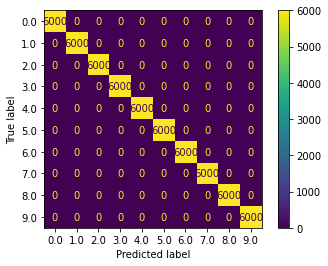

In [27]:
ConfusionMatrixDisplay.from_estimator(search_svc, X_train, y_train)

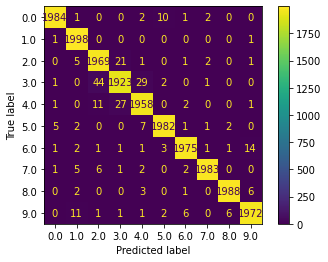

In [28]:
ConfusionMatrixDisplay.from_estimator(search_svc, X_test, y_test)

#### Wrong Predictions

In [36]:
idxs = np.ndarray.flatten(np.argwhere(y_test != y_preds_svc))
print(len(idxs))

268


In [37]:
idxs = np.random.choice(idxs, 100, replace=False)
samples = pca74.inverse_transform(X_test_pca74)

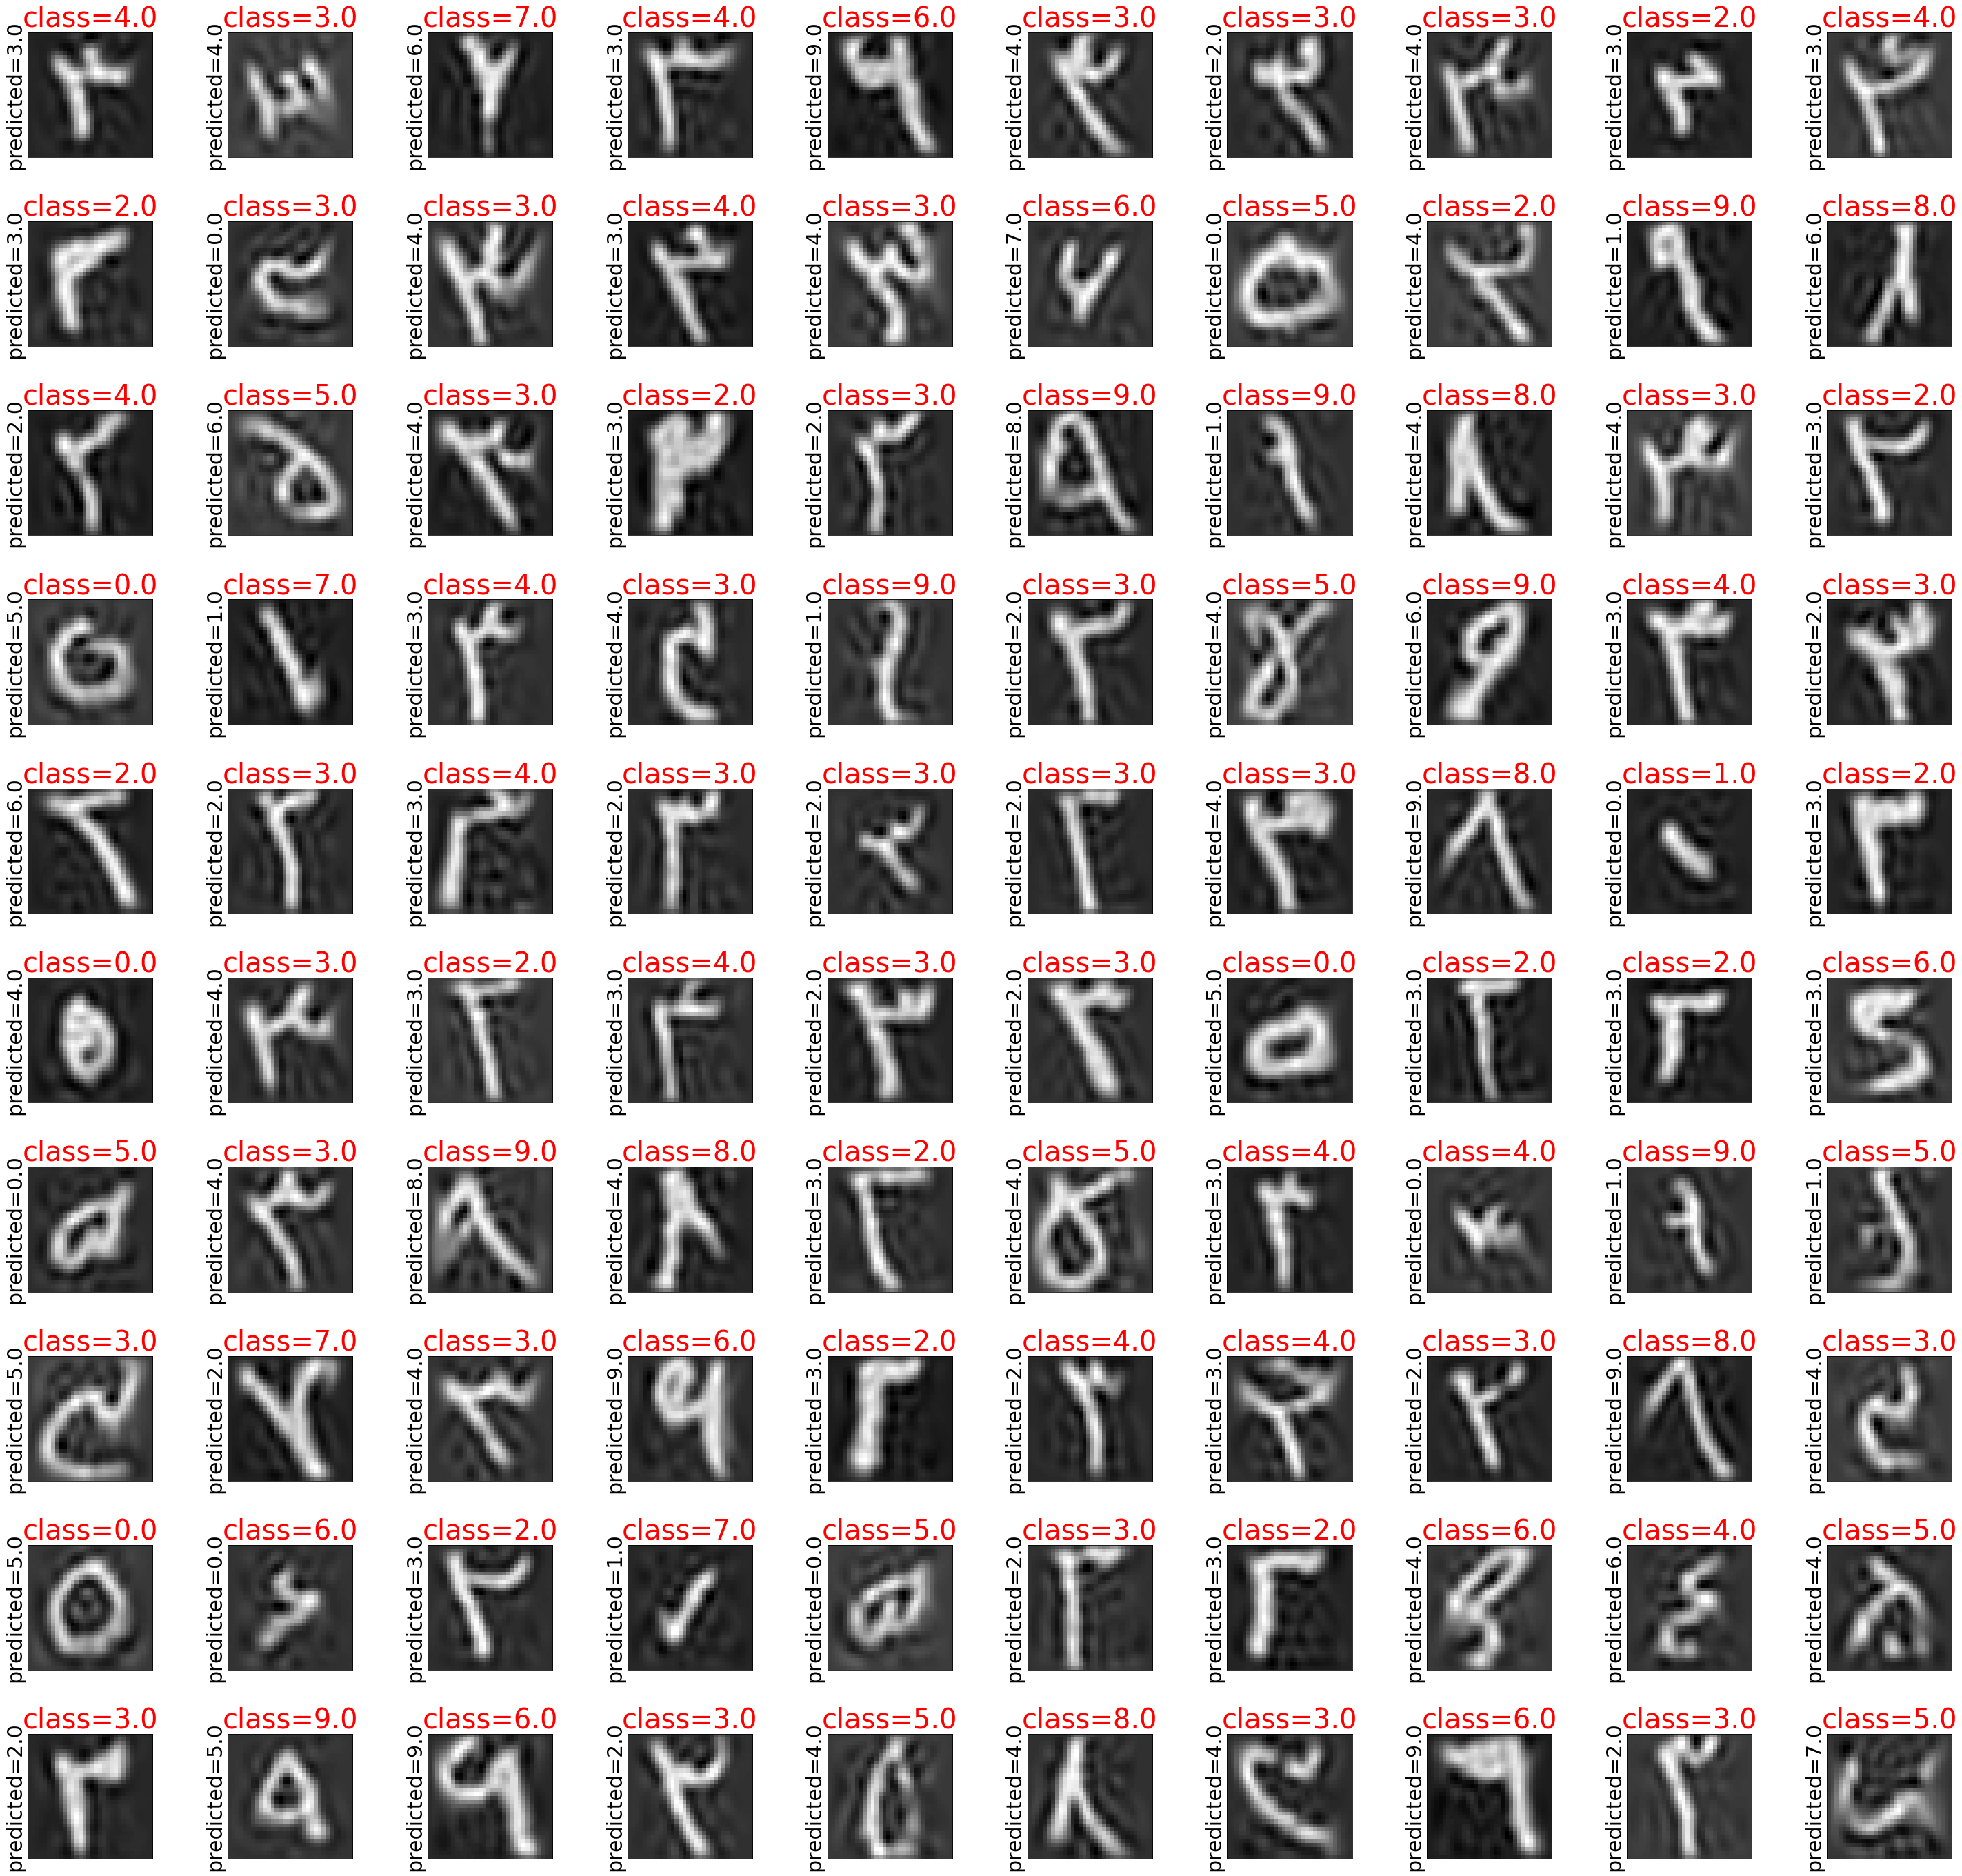

In [38]:
plot_wrong_preds(samples, y_test, y_preds_svc)

#### Save

In [47]:
model = search_svc
# save the model
filename = 'svc_model.pkl'
with open(filename, 'wb') as file:
  pickle.dump(model, file)

# load the model
# with open(filename, 'rb') as file:
#   pickle_model = pickle.load(file)